In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

from evoscape.landscapes import Landscape, Somitogenesis_Landscape
from evoscape.modules import Node, UnstableNode, Center, NegCenter
from evoscape.landscape_visuals import *
import evoscape.morphogen_regimes as mr
%load_ext autoreload

In [2]:
plt.style.use('default')
plt.rcParams.update({'figure.dpi': 200}) 
plt.rcParams.update({'font.size': 15})  
plt.rcParams['axes.grid'] = False

In [3]:
time_pars = (0., 50., 201)

fitness_pars = {
    'ncells': 100,
    'time_pars': time_pars,
    'init_state': (0., 0.),
    't0_shift': 0.25,  # shift (delay) of the time of transition between 2 neighbor cells 
    'noise': 0.0,
    'low_value': -1.,
    'high_value': 1.,
    'penalty_weight': 0.1,
    't_stable': 5, # how many timepoints should be at steady state
    'ndt': 50,
}

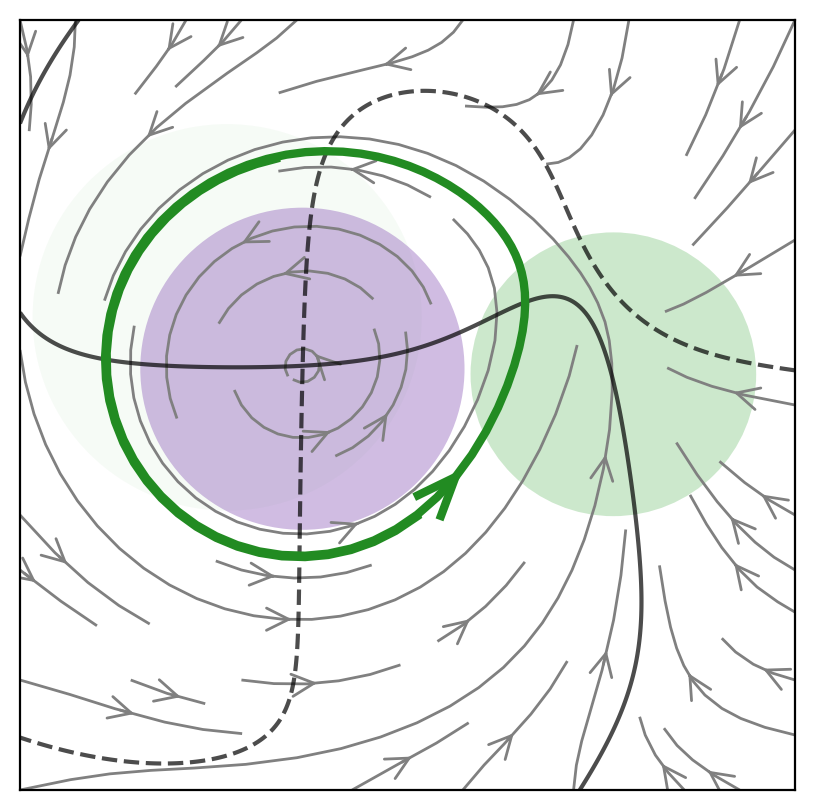

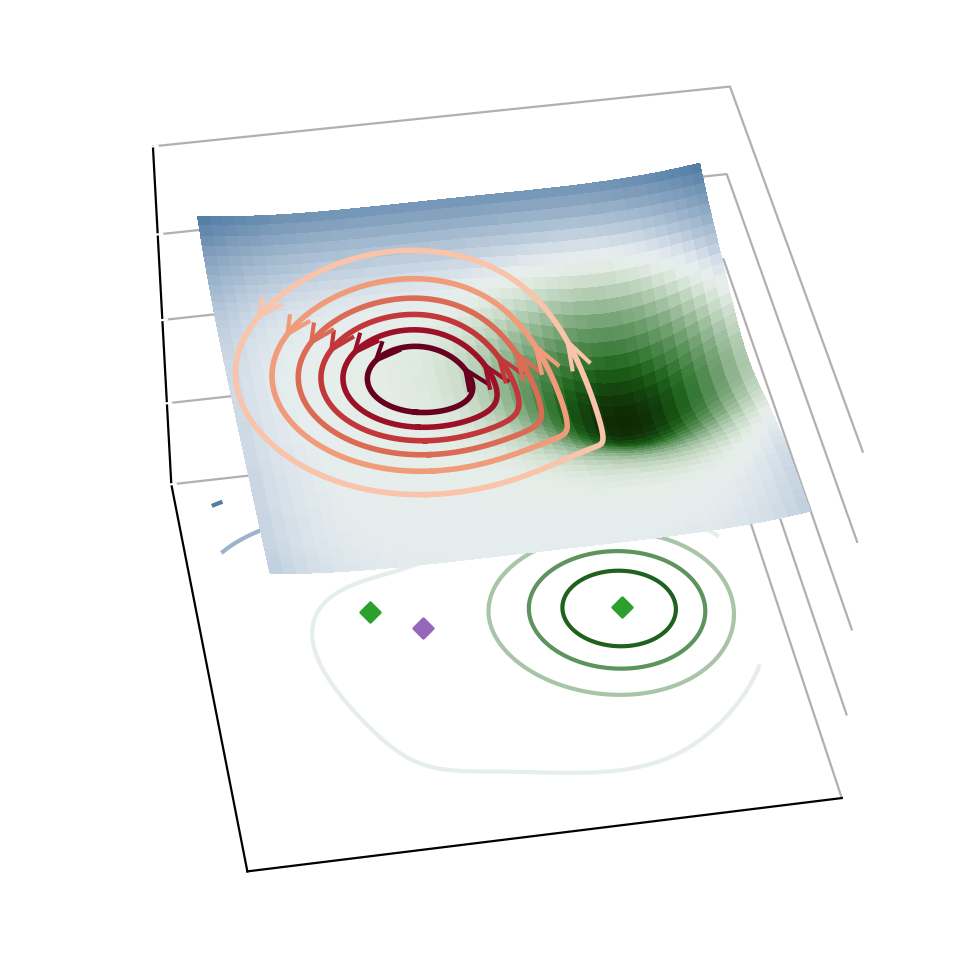

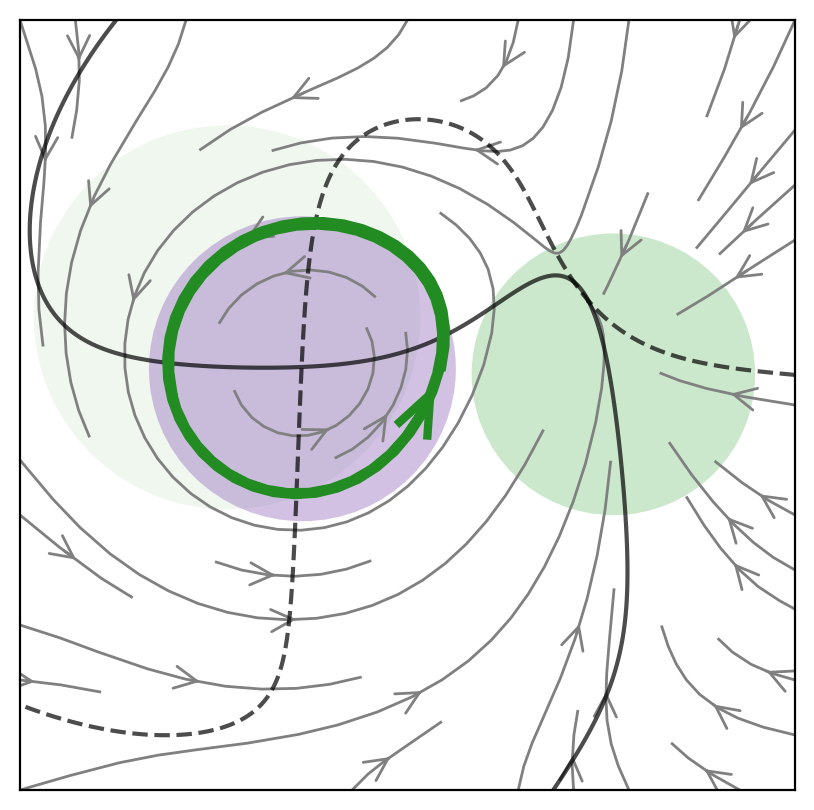

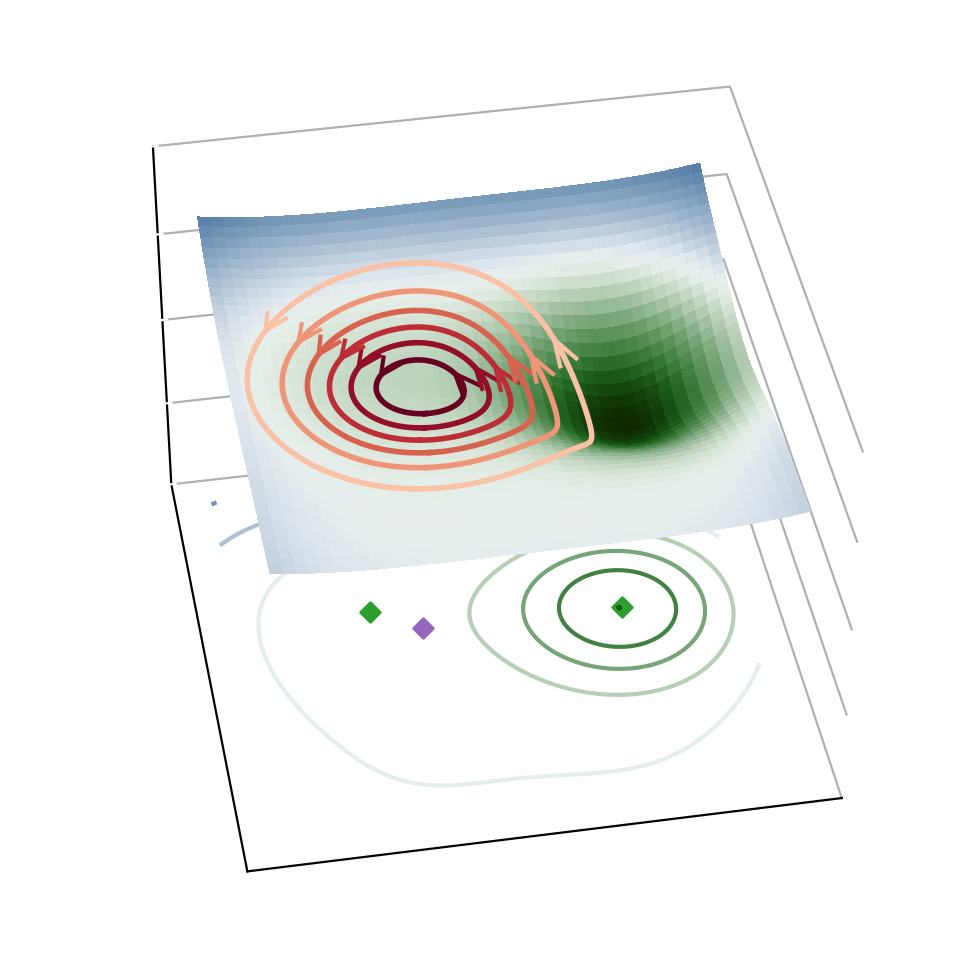

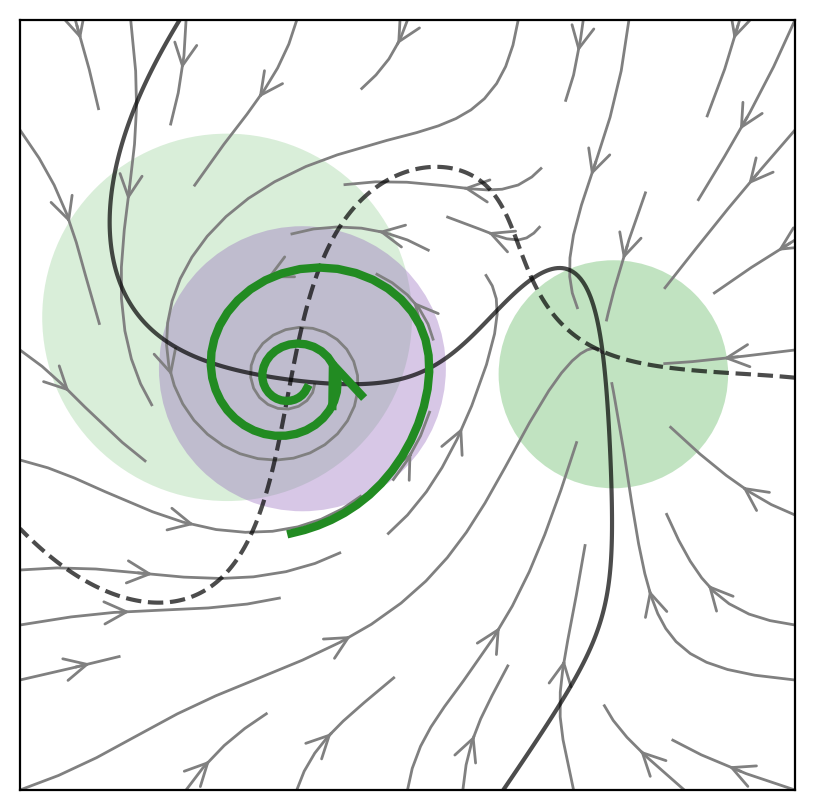

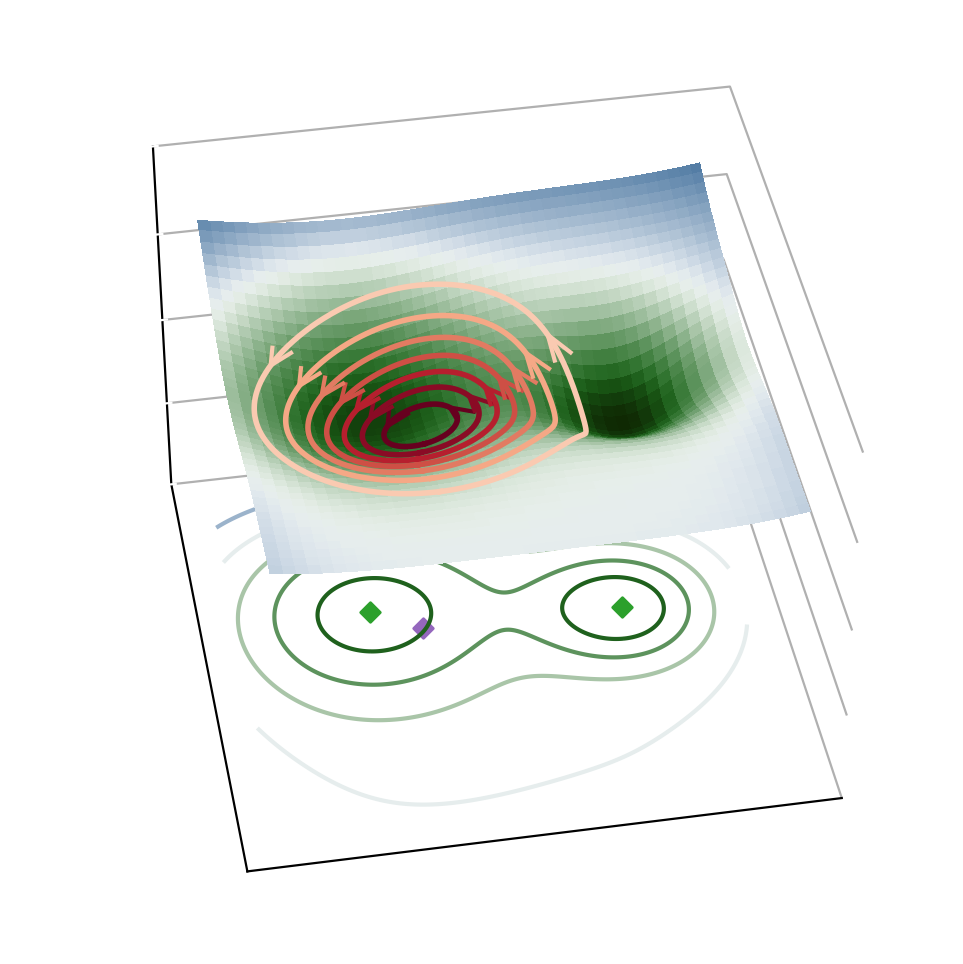

In [4]:
%autoreload

M1 = Node(-1.396520984146739, 1.6829665061300272, a = [0.021,  1.4176], s = [1.2766, 1.0875], tau = 0.7336)
M2 = Node(1.5938144419754061, 1.2394544731911954, a = [0.9109, 2.6167], s = [0.937, 0.225], tau = 0.4747)
M3 = Center(-0.8136619835740215, 1.2825727653806398, a = [3.274, 0.7666], s = [1.0851, 0.7533], tau = 1.8714)


module_list = [M1, M2, M3]

L = 3.
npoints = 301
q = np.linspace(-L, L, npoints)
xx, yy = np.meshgrid(q,q+1, indexing = 'xy')

landscape = Somitogenesis_Landscape(module_list, regime=mr.mr_sigmoid, morphogen_times=(0.,), A0=0.005)

zlim=(-3, 1)
start = (100, 10, 0)
init_cond = ((-0.8, -0.1), (-1, 0.3), (-0.9, 0.))
# init_cond = ((-0.8, 1.5), (-1, 0.3), (-0.9, 0.))

times = ((0, 20, 201), (0, 20, 201), (0, 8, 81))

for it, t in enumerate((-5., -2.2, -0.5)):
    fig = visualize_landscape_t(landscape, xx, yy, t=t, color_scheme='fp_types', traj_times=times[it], traj_init_cond=init_cond[it],
                                traj_start=start[it])
    fig = visualize_potential(landscape, xx, yy, t=t, elev=40, azim=-100, color_scheme='fp_types', scatter=True, cmap_center=0, zlim=zlim, rot_contour=True)

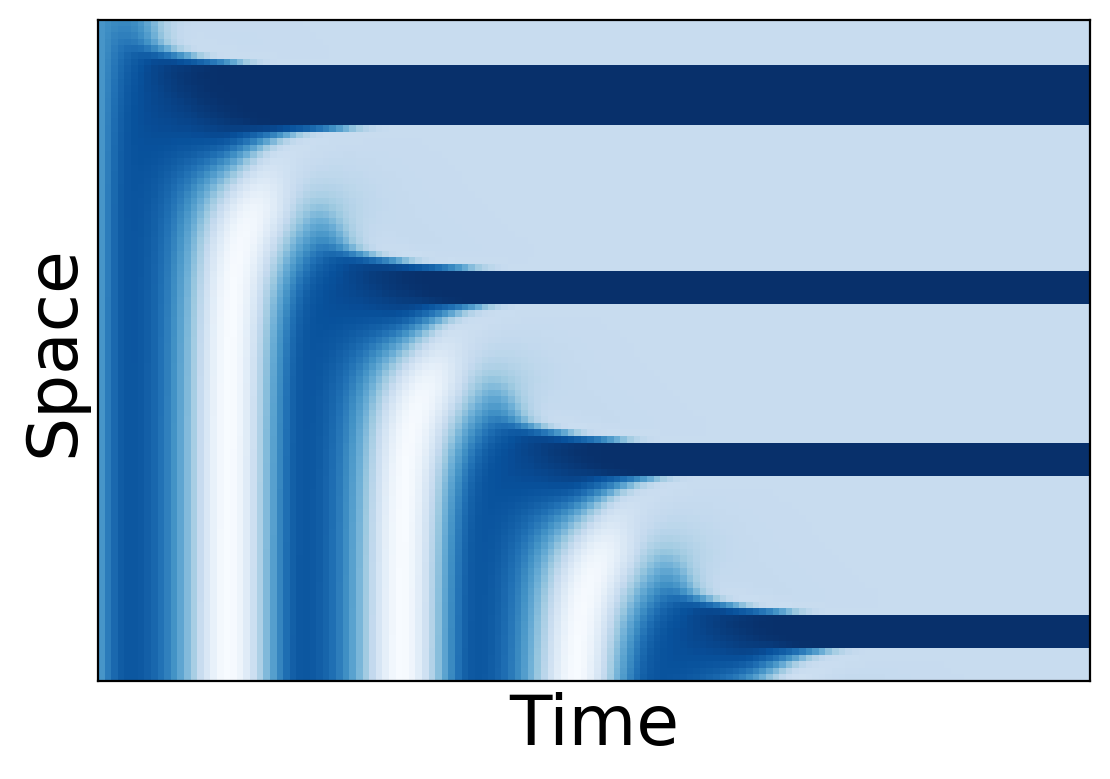

In [8]:
# landscape.get_fitness(fitness_pars)
plt.imshow(landscape.result[:, :150], cmap='Blues')
plt.xlabel('Time', fontsize=25)
plt.ylabel('Space', fontsize=25)
plt.xticks(())
plt.yticks(())
plt.show()

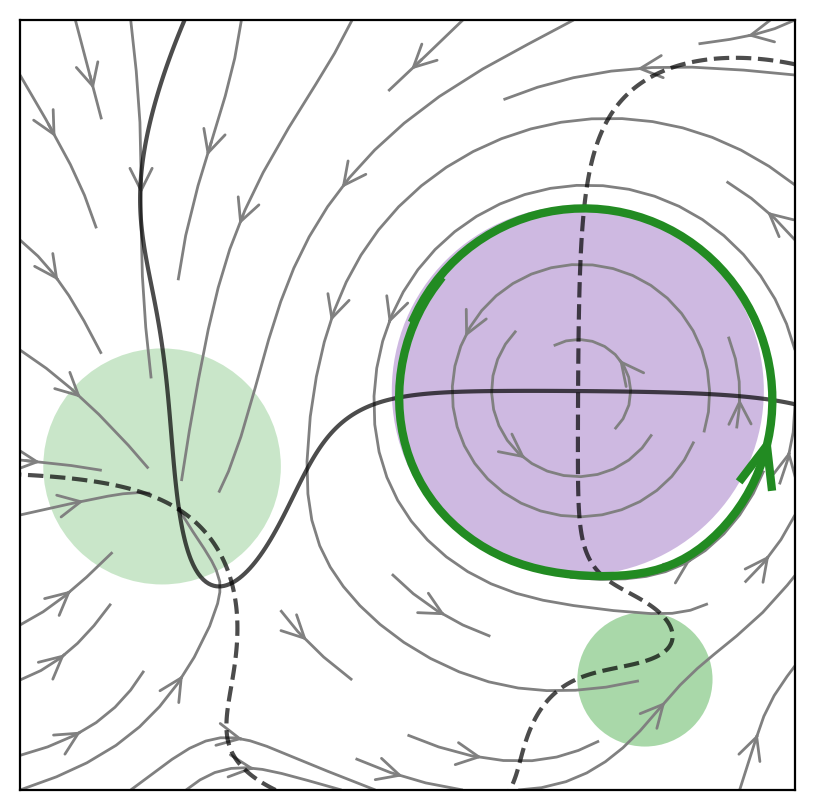

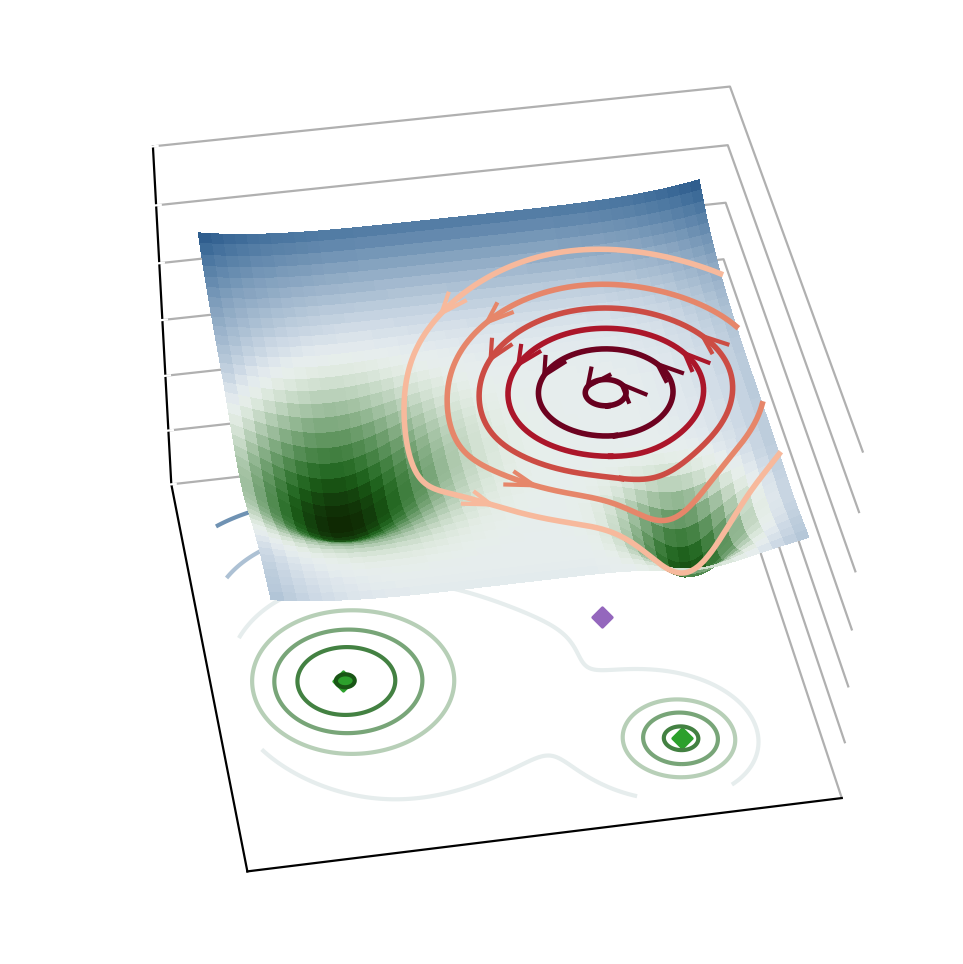

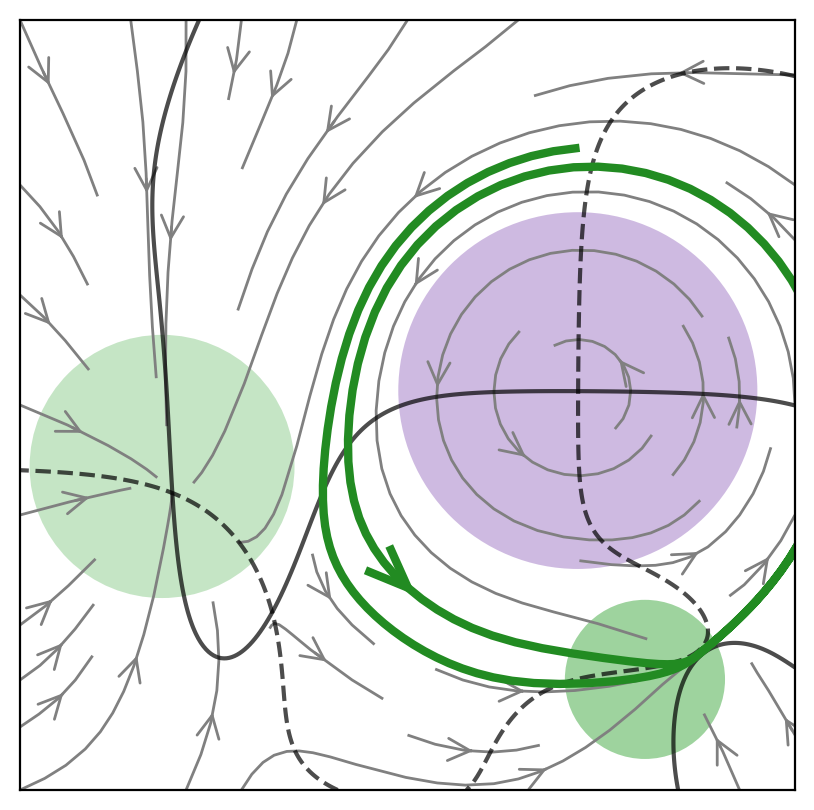

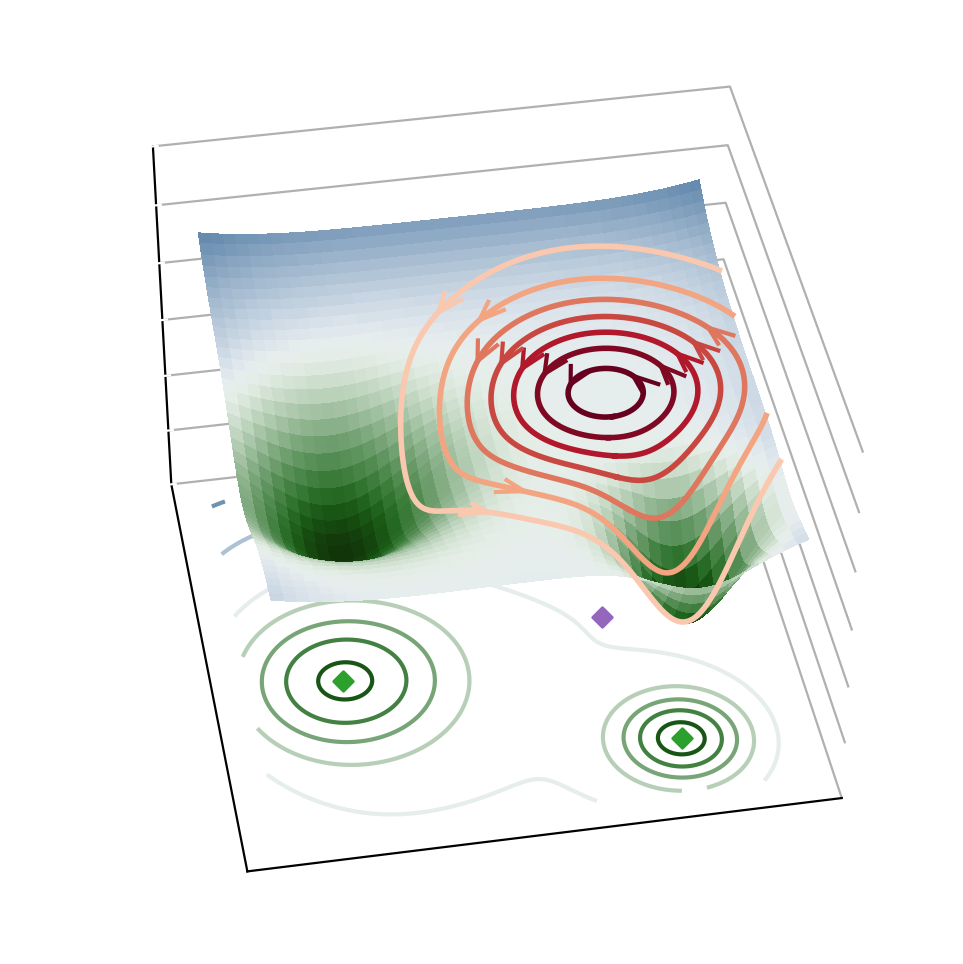

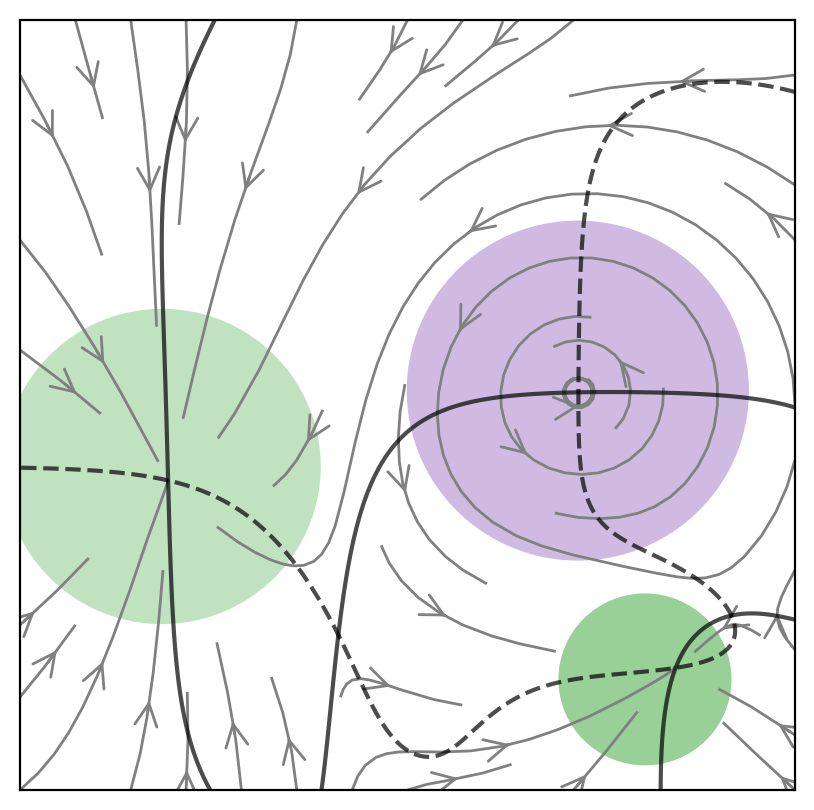

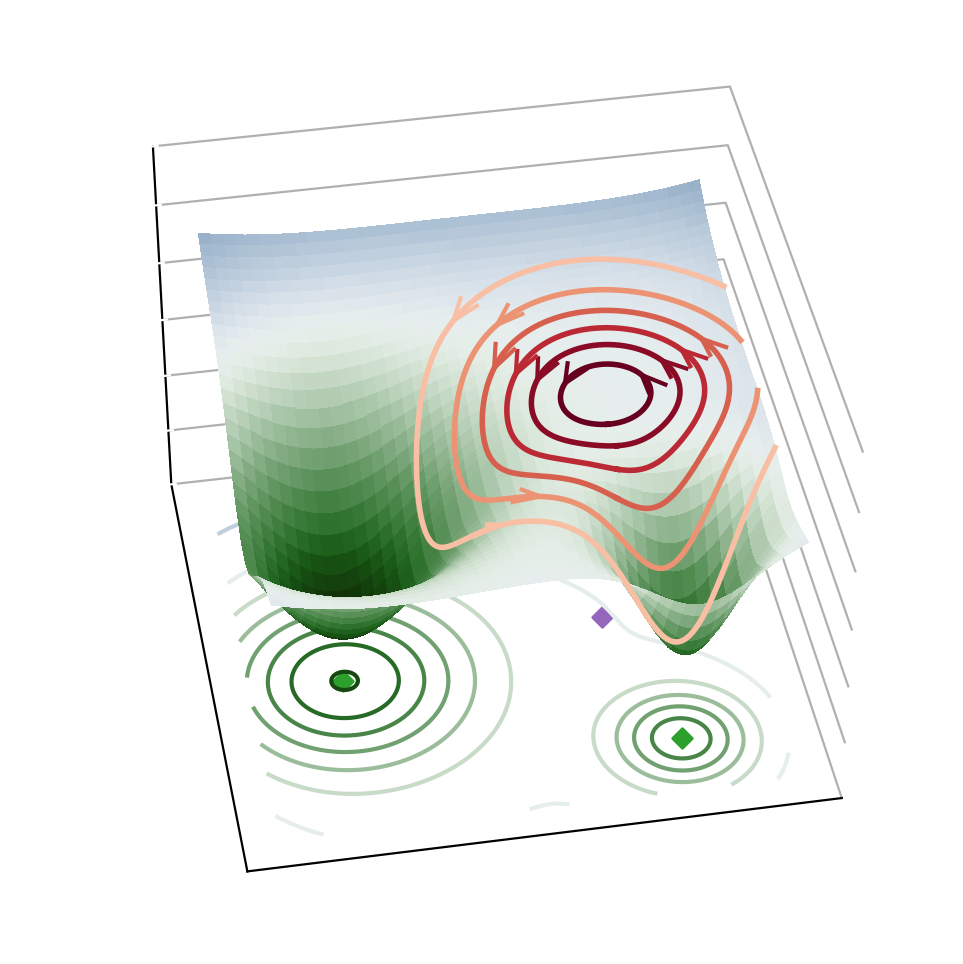

In [9]:
M1 = Node(1.8382491303500434, -1.1381125475805725, a = [0.8862, 3.798 ], s = [0.2547, 0.5699], tau = 0.4982)
M2 = Node(-1.9000711817562257, 0.5212171669237642, a = [0.2379, 1.7334], s = [0.2522, 1.2541], tau = 1.9099)
M3 = Center(1.3186398446050207, 1.1123626132714173, a = [3.4343, 3.1594], s = [1.3636, 1.1037], tau = 0.9818)

module_list = [M1, M2, M3]

landscape = Somitogenesis_Landscape(module_list, regime=mr.mr_sigmoid, morphogen_times=(0.,), A0=0.005)

zlim=(-2,1)

start = (40, 0, 0)   # 40, 100, 0 
init_cond = ((2.8, 1.11), (1.3, 3.), (1.21, 1.11))   # x=2.8 for the 1st, 

# init_cond = ((2.8, 1.11), (1.7, 1.2), (1.21, 1.11))   # x=2.8 for the 1st, 

times = ((0, 5.5, 151), (0, 25, 251), None)

for it, t in enumerate((0.2, 0.9, 2.5)):
    fig = visualize_landscape_t(landscape, xx, yy, t=t, color_scheme='fp_types', traj_times=times[it], traj_init_cond=init_cond[it],
                                traj_start=start[it])
    fig = visualize_potential(landscape, xx, yy, t=t, elev=40, azim=-100, color_scheme='fp_types', scatter=True, cmap_center=0, zlim=zlim, rot_contour=True)

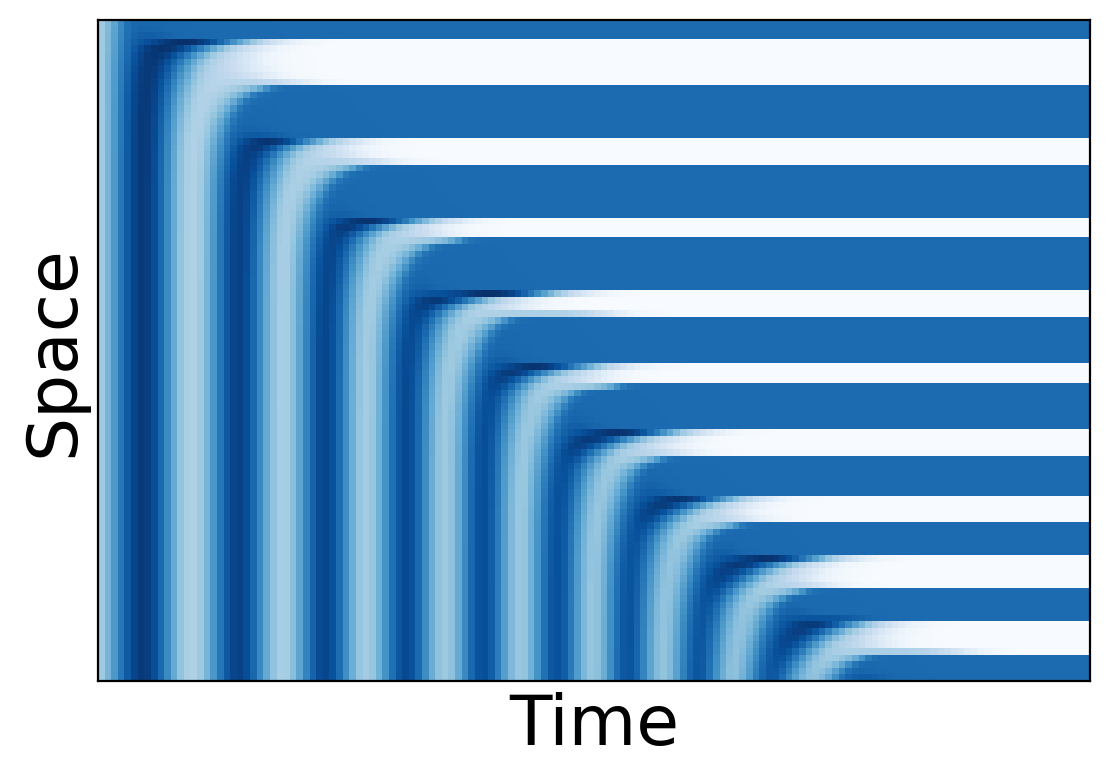

In [10]:
landscape.get_fitness(fitness_pars)
plt.imshow(landscape.result[:, :150], cmap='Blues')
plt.xlabel('Time', fontsize=25)
plt.ylabel('Space', fontsize=25)
plt.xticks(())
plt.yticks(())
plt.show()

/Users/victoria/Code/landscapes/src/evoscape/landscape_visuals.py:133: RuntimeWarning: invalid value encountered in divide
  direction /= np.linalg.norm(direction)


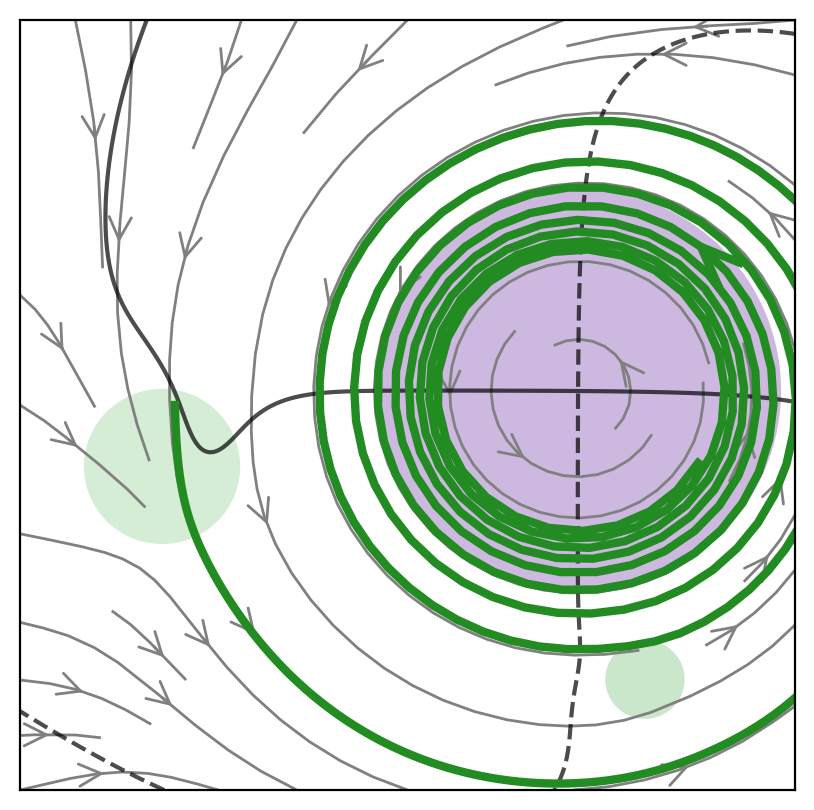

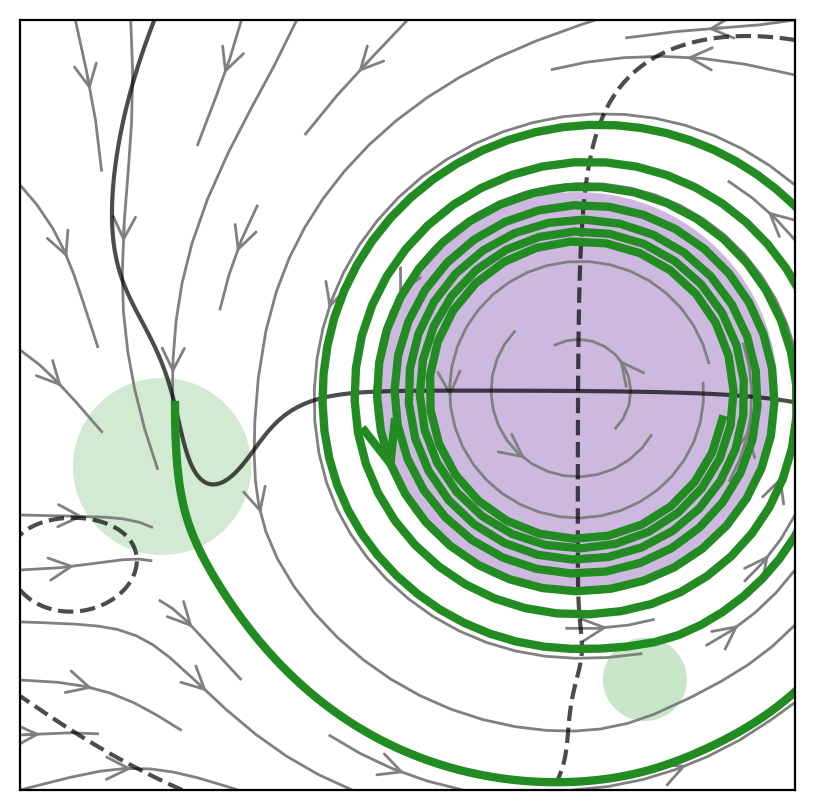

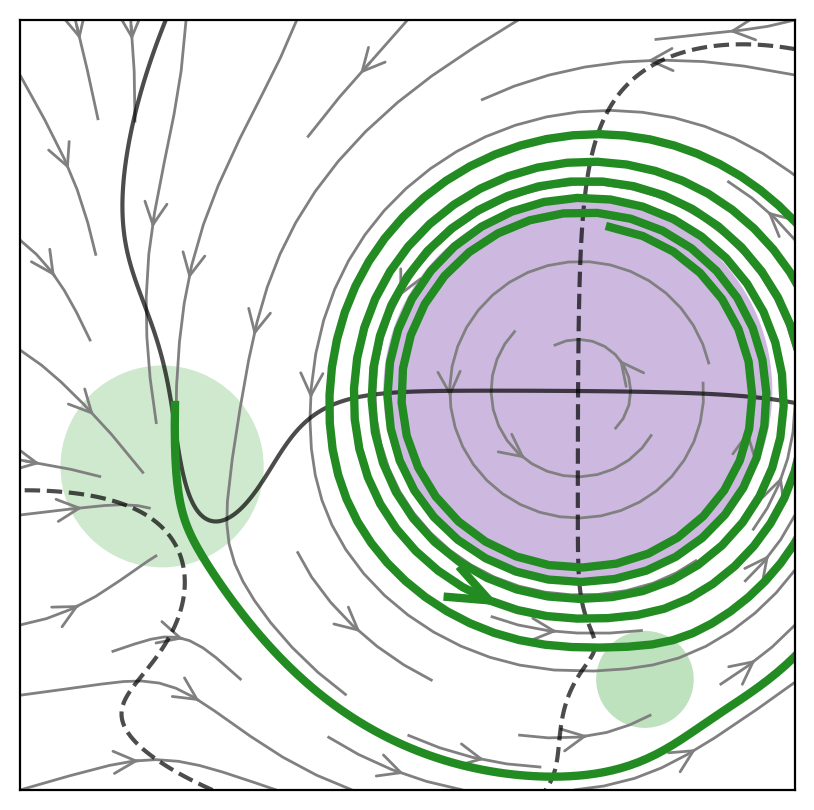

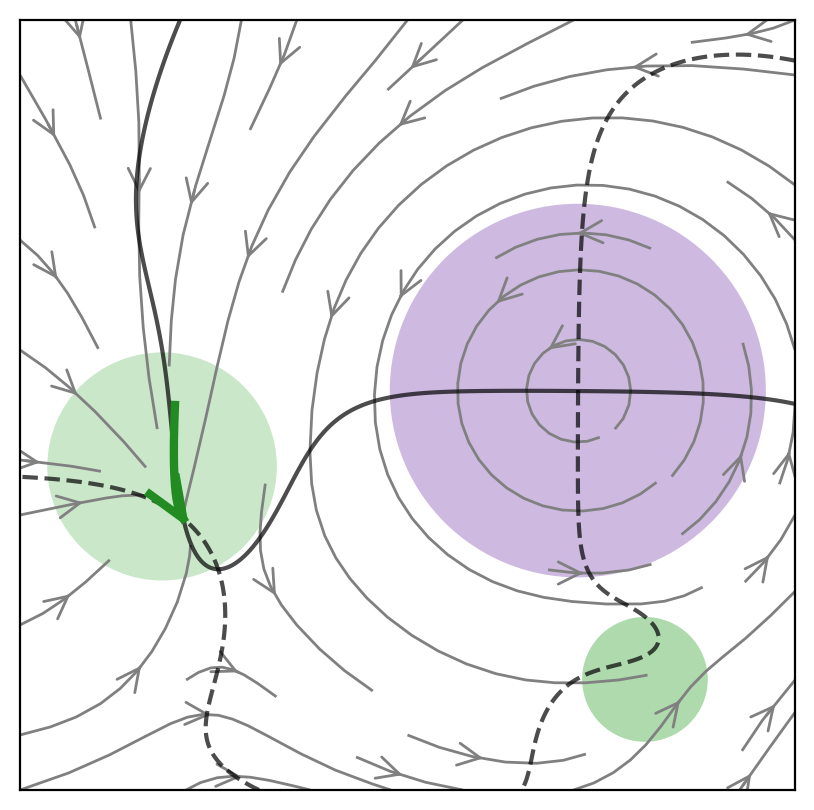

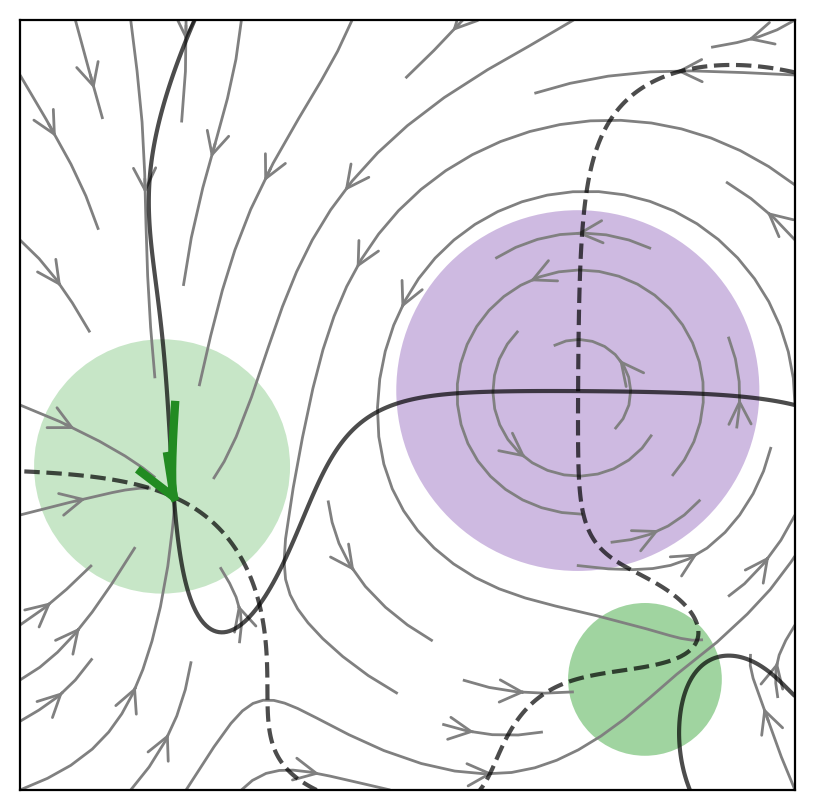

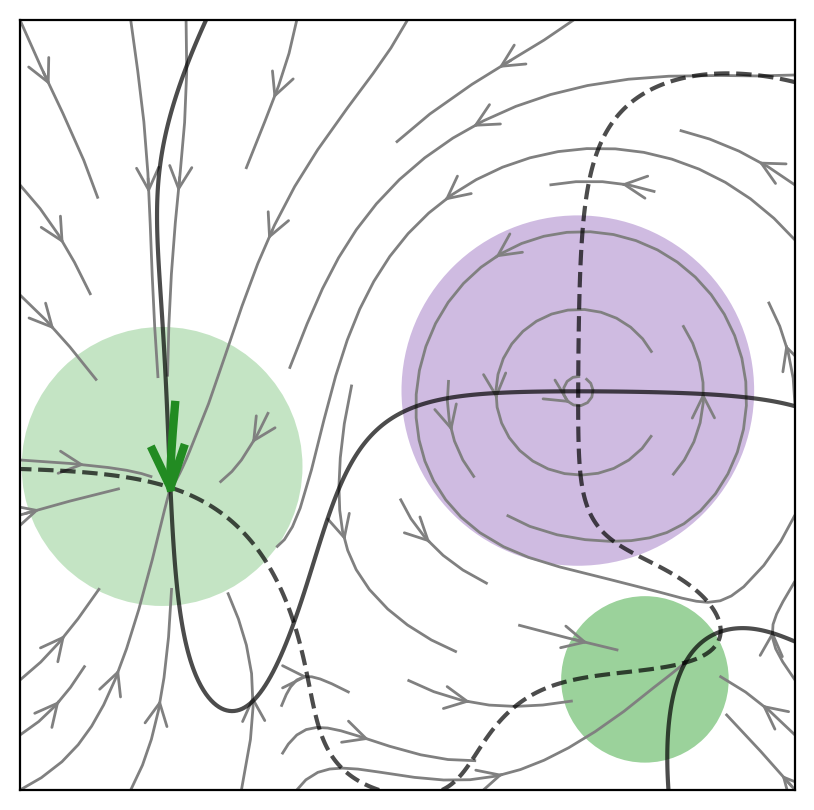

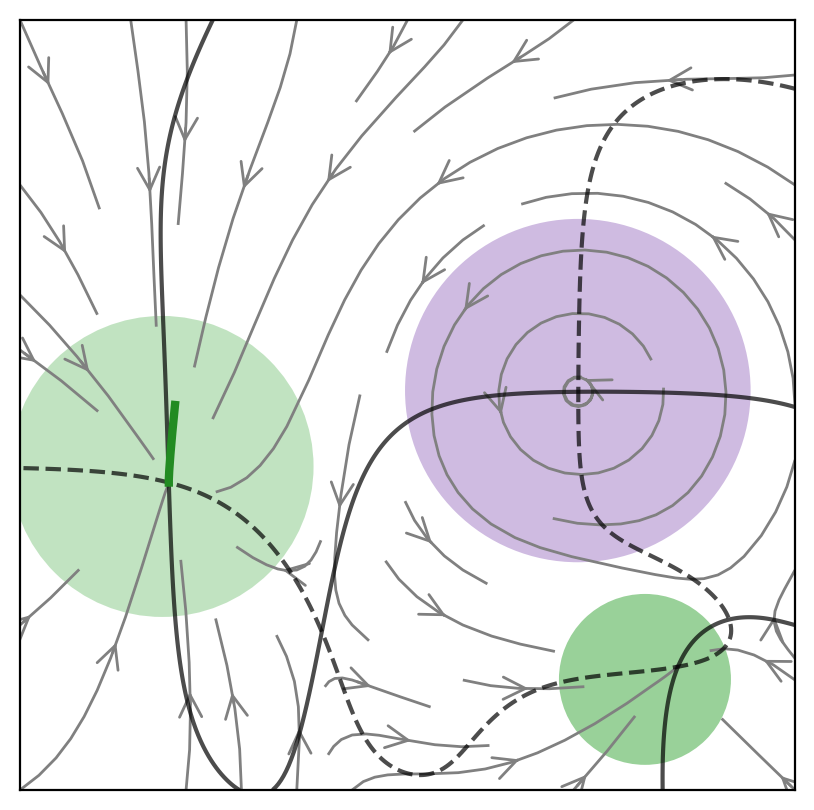

In [11]:
time_pars = (-2, 2., 7)
times = np.linspace(*time_pars)
n_cells = 6 
# angles = np.linspace(0., 2*np.pi, n_cells+1)[:-1]
# r = 1.5
# cell_init_cond = np.array([r*np.cos(angles), r*np.sin(angles)])

# landscape.init_cells(n_cells, init_cond=cell_init_cond)
# traj, states = landscape.run_cells(*time_pars, ndt=100)
# print(traj.shape)
for it, t in enumerate(times):
    fig, ax = visualize_landscape_t(landscape, xx, yy, t, color_scheme='fp_types', traj_times=(0, 41, 401), traj_init_cond=(-1.8,1.), traj_start=0)
    # ax.scatter(traj[0,:,it], traj[1,:,it], marker='o', s=30, zorder=10, c=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', ]) #'#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
    # fig.savefig('figures/homoclinic_movie_2/'+str(it))
    # plt.close(fig)  
    

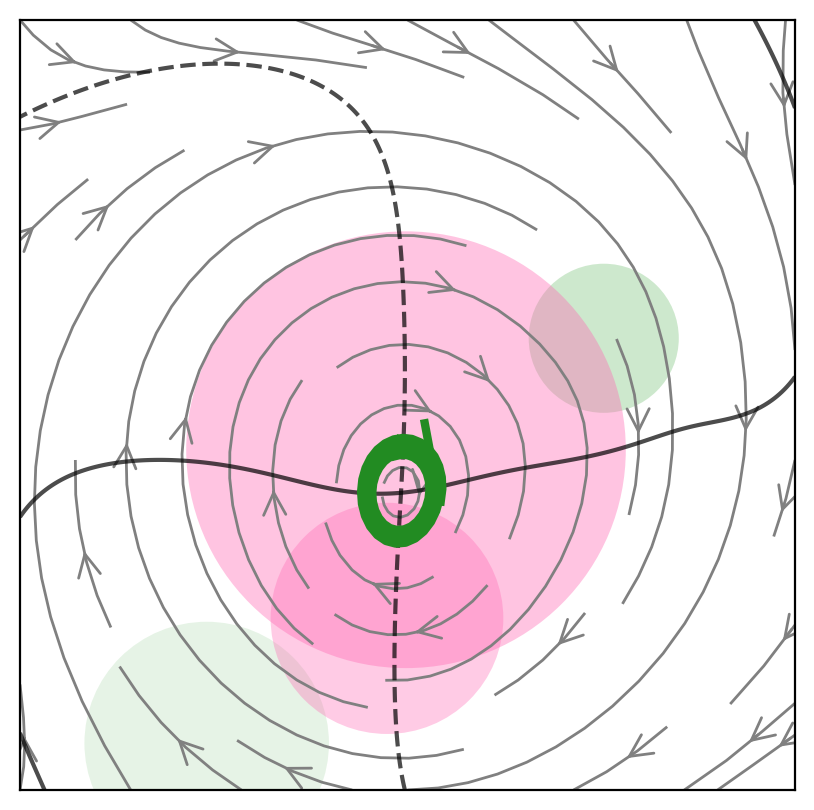

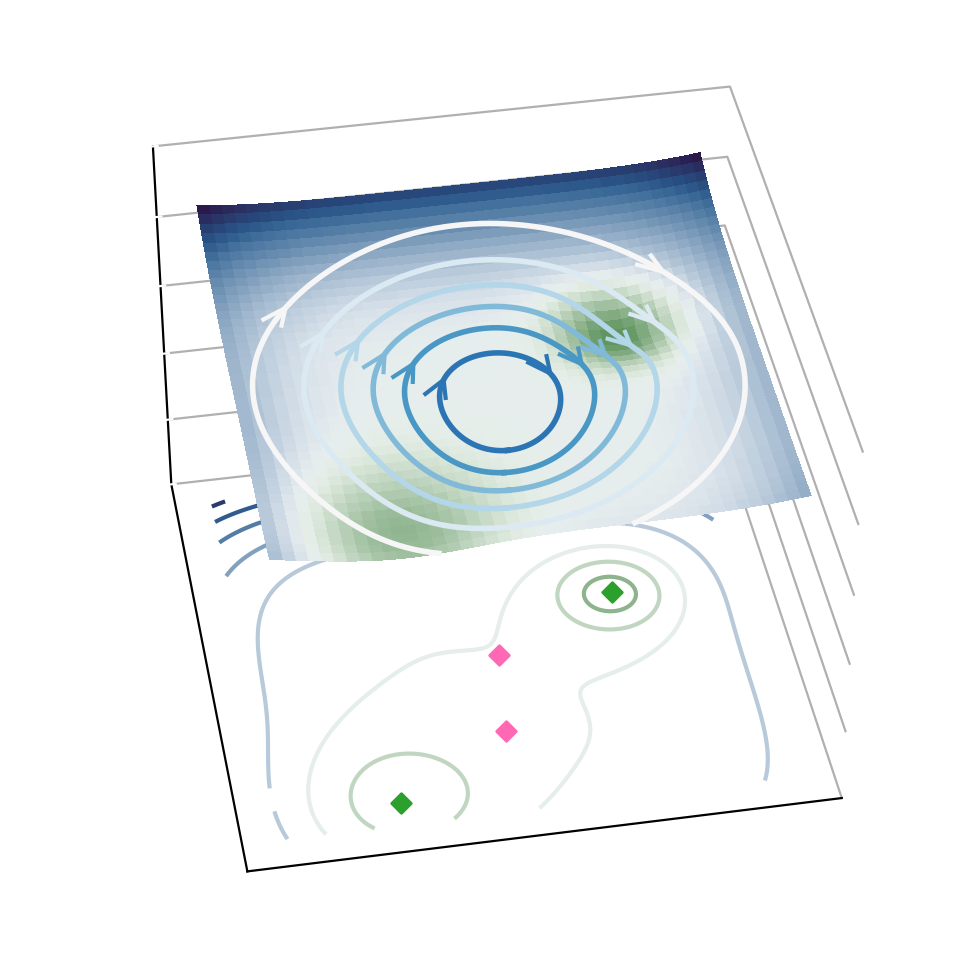

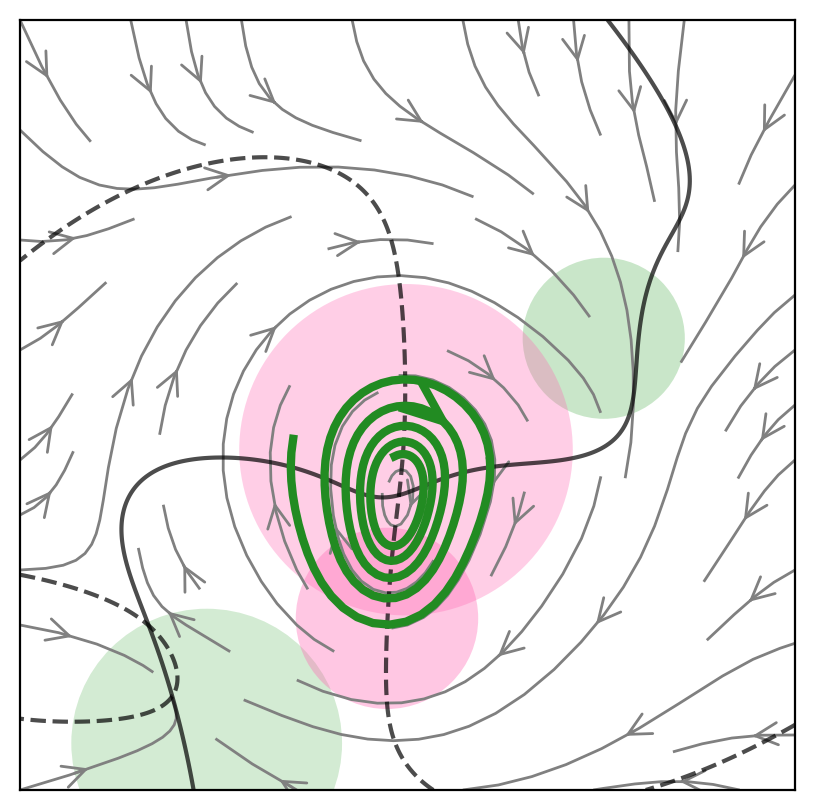

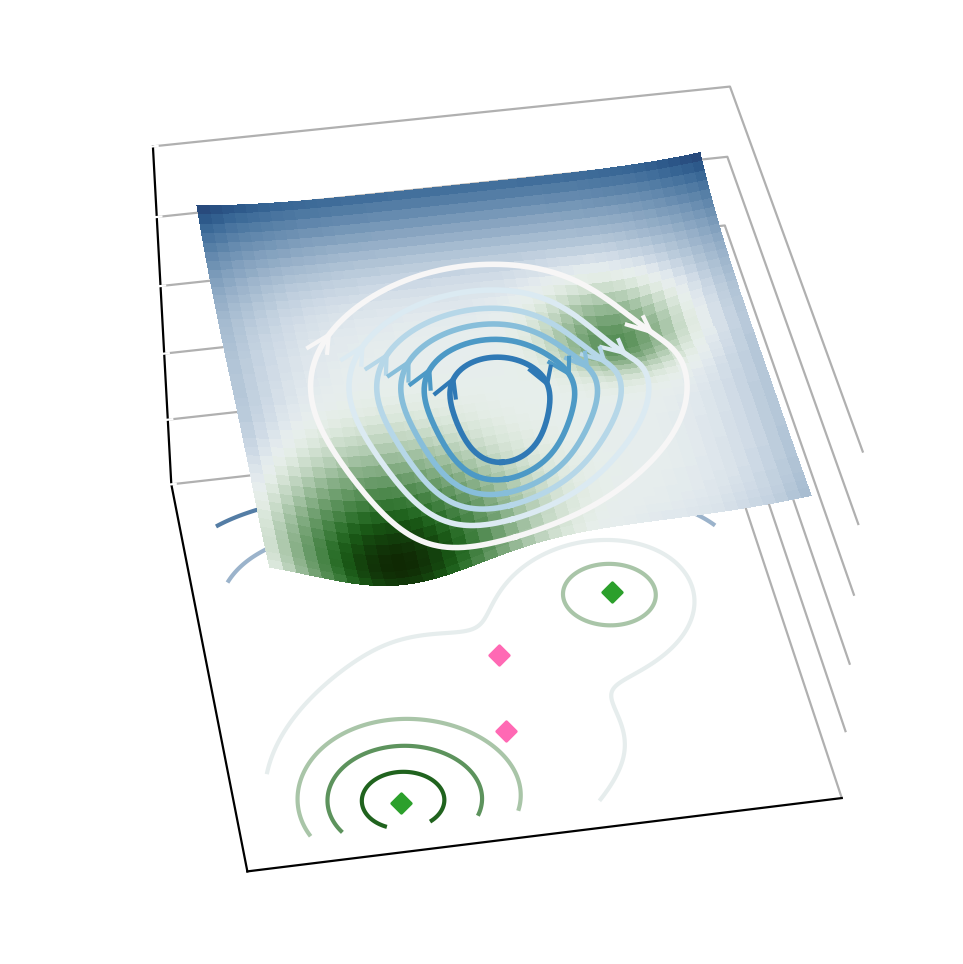

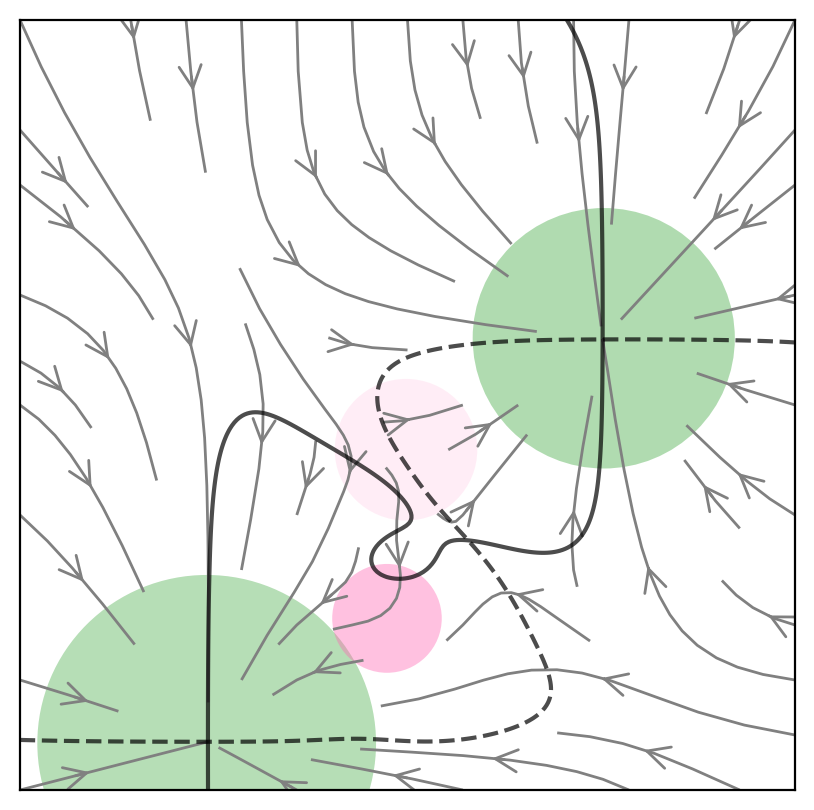

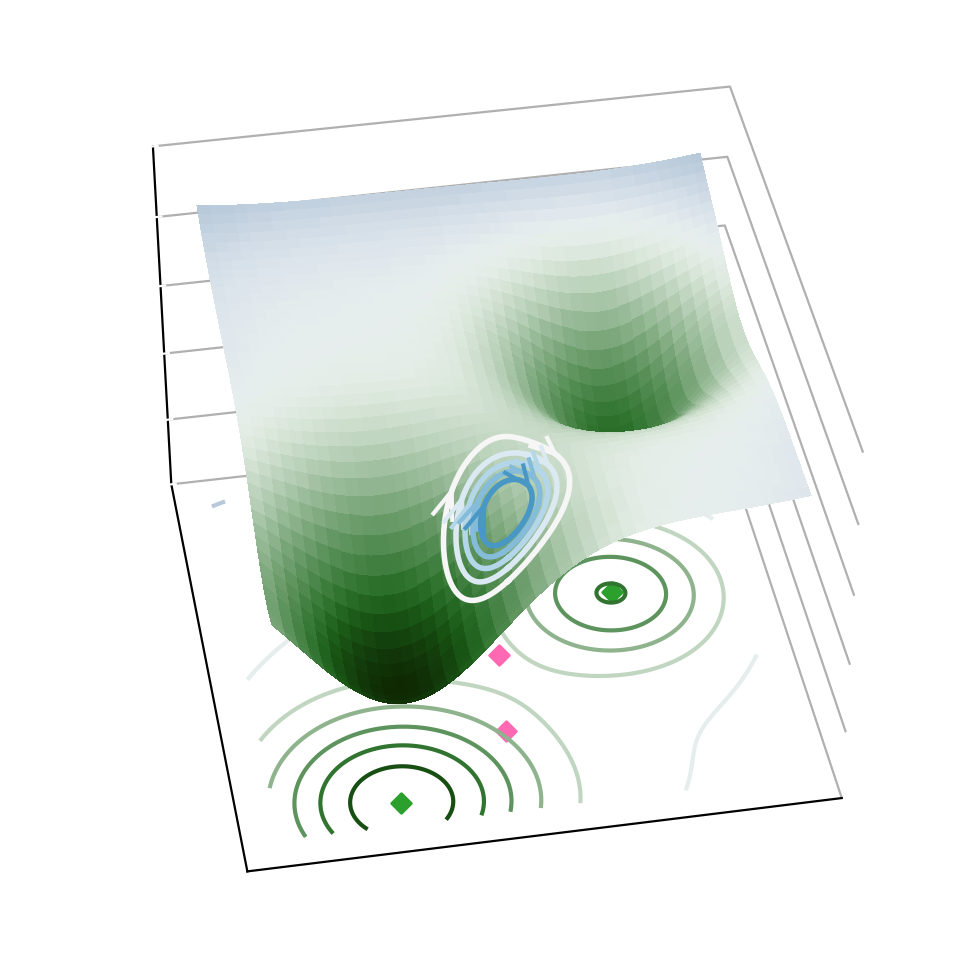

In [12]:
%autoreload 

M1 = Node(x=-1.5546770206538318, y=-1.6355540804849715, a = [0.2227, 1.8863], s = [0.8021, 1.1112], tau = 0.21)
M2 = Node(x=1.5193310233235011, y=1.5199678692108587, a = [0.8811, 2.2256], s = [0.4923, 0.86], tau = 0.0947)
M3 = NegCenter(x=-0.011546229550786435, y=0.6514305642664748, a = [2.4758, 0.1994], s = [1.445, 0.467], tau = 0.3441)
M4 = NegCenter(x=-0.15884746768104208, y=-0.6625725096540123, a = [1.65, 2.8492], s = [0.8949, 0.2594], tau = 1.4895)

module_list = [M1, M2, M3, M4]

landscape = Somitogenesis_Landscape(module_list, regime=mr.mr_sigmoid, morphogen_times=(0.,), A0=0.005)

zlim=(-4 ,1)

start = (50, 100, 0)   # 100, 10, 0 
# init_cond = ((1.6, 0.5), (1.65, 0.5), (1.21, 1.11))
init_cond = ((-0.1, 0.6), (-0.1, 0.6), (1.21, 1.11))

times = ((0, 25, 251), (0, 25, 251), None)

for it, t in enumerate((-2., -0.2, 2.5)):
    fig = visualize_landscape_t(landscape, xx, yy, t=t, color_scheme='fp_types', traj_init_cond=init_cond[it], traj_times=times[it])
    fig = visualize_potential(landscape, xx, yy, t=t, elev=40, azim=-100, color_scheme='fp_types', scatter=True, cmap_center=0.0, zlim=zlim, rot_contour=True)


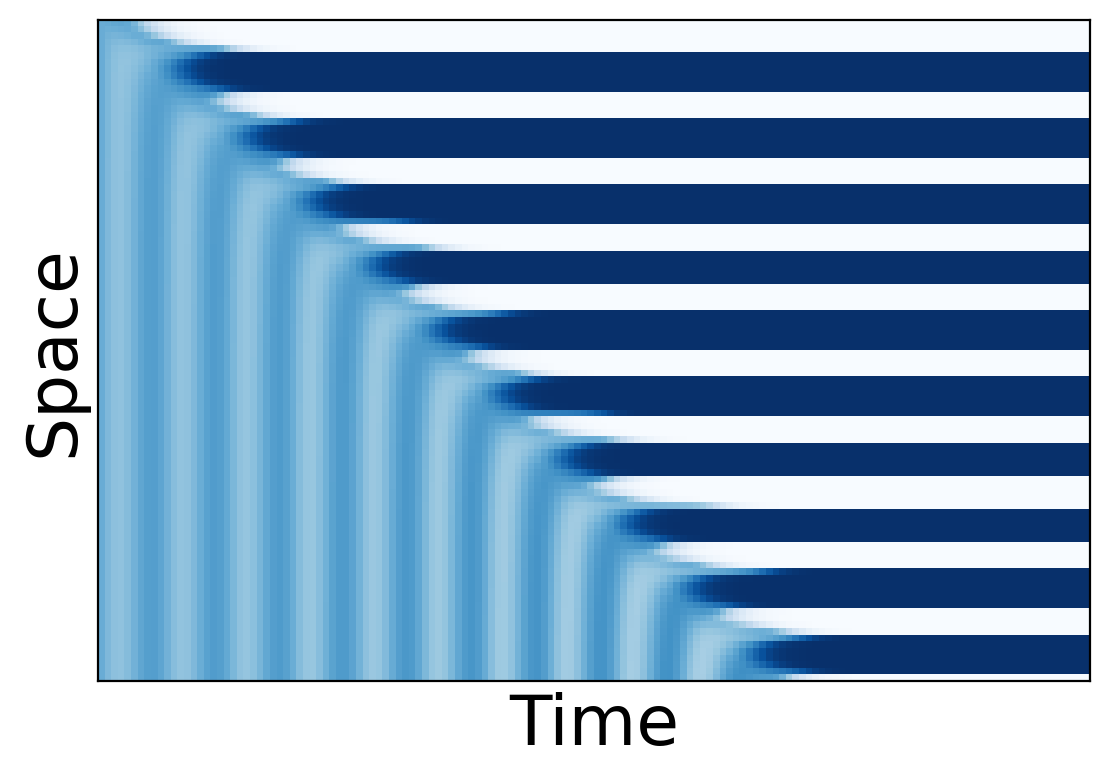

In [13]:
landscape.get_fitness(fitness_pars)
plt.imshow(landscape.result[:, :150], cmap='Blues')
plt.xlabel('Time', fontsize=25)
plt.ylabel('Space', fontsize=25)
plt.xticks(())
plt.yticks(())
plt.show()

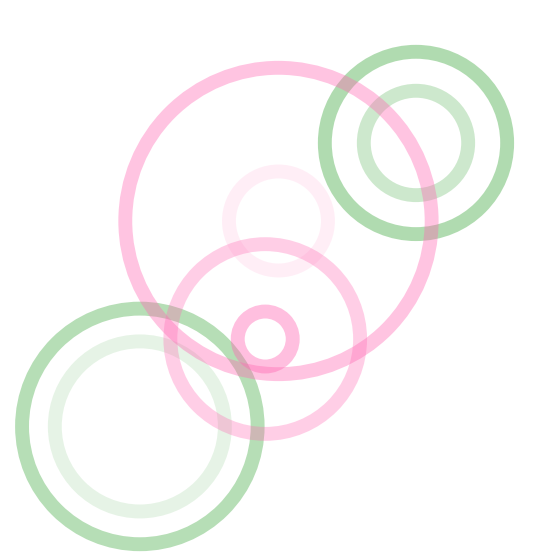

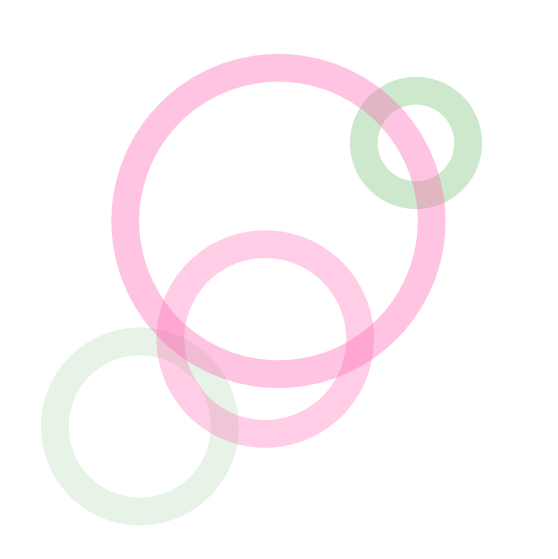

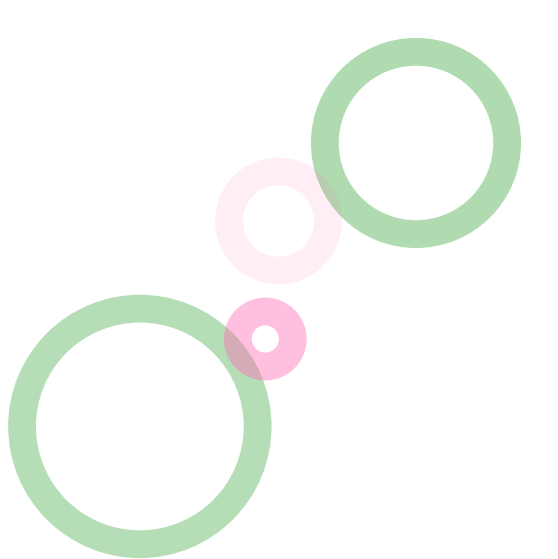

In [160]:

M1 = Node(x=-1.5546770206538318, y=-1.6355540804849715, a = [0.2227, 1.8863], s = [0.8021, 1.1112], tau = 0.21)
M2 = Node(x=1.5193310233235011, y=1.5199678692108587, a = [0.8811, 2.2256], s = [0.4923, 0.86], tau = 0.0947)
M3 = NegCenter(x=-0.011546229550786435, y=0.6514305642664748, a = [2.4758, 0.1994], s = [1.445, 0.467], tau = 0.3441)
M4 = NegCenter(x=-0.15884746768104208, y=-0.6625725096540123, a = [1.65, 2.8492], s = [0.8949, 0.2594], tau = 1.4895)

module_list = [M1, M2, M3, M4]
landscape = Landscape(module_list, regime=mr.mr_sigmoid, morphogen_times=(0.,), A0=0.005)

fig = circle_plot(landscape, L=3, color_scheme='fp_types', lw=10)
fig = circle_plot(landscape, 0, L=3, color_scheme='fp_types', lw=20)
fig = circle_plot(landscape, 1, L=3, color_scheme='fp_types', lw=20)


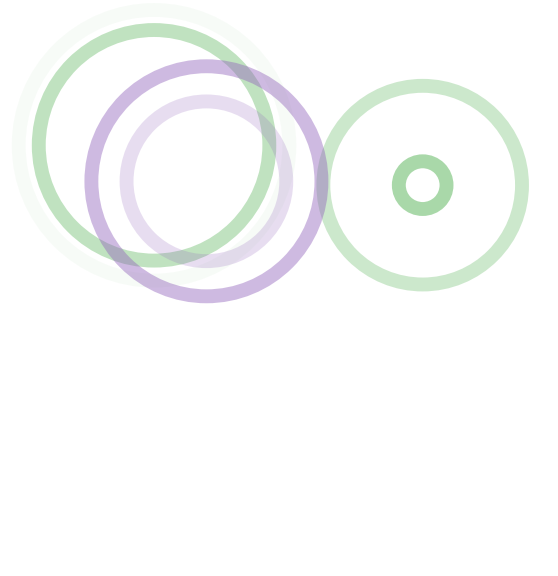

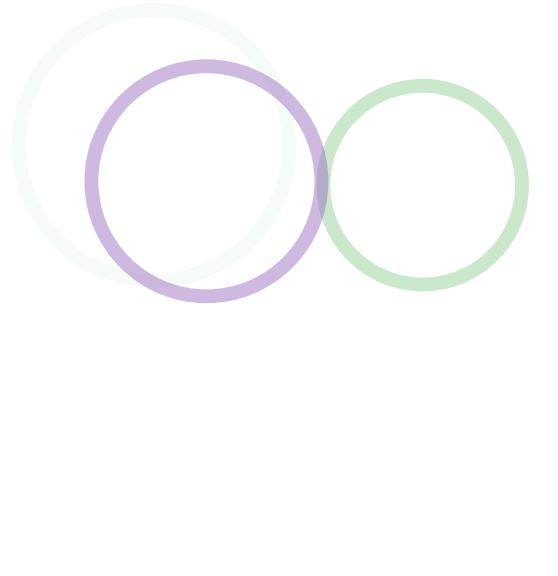

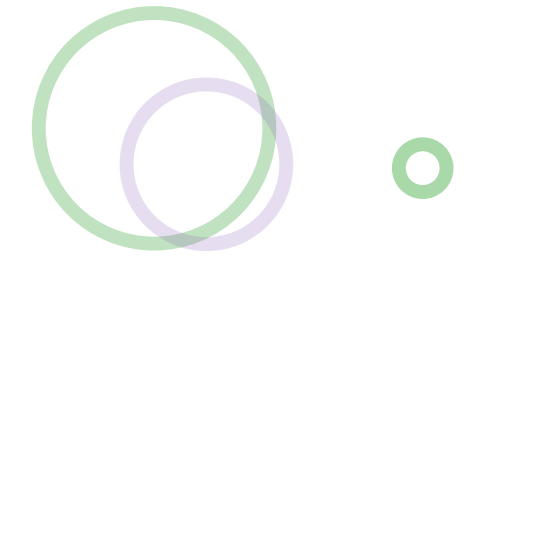

In [158]:
M1 = Node(-1.396520984146739, 1.6829665061300272, a = [0.021,  1.4176], s = [1.2766, 1.0875], tau = 0.7336)
M2 = Node(1.5938144419754061, 1.2394544731911954, a = [0.9109, 2.6167], s = [0.937, 0.225], tau = 0.4747)
M3 = Center(-0.8136619835740215, 1.2825727653806398, a = [3.274, 0.7666], s = [1.0851, 0.7533], tau = 1.8714)

module_list = [M1, M2, M3]
landscape = Landscape(module_list, regime=mr.mr_sigmoid, morphogen_times=(0.,), A0=0.005)

fig = circle_plot(landscape, L=3, color_scheme='fp_types', lw=10)
fig = circle_plot(landscape, 0, L=3, color_scheme='fp_types', lw=10)
fig = circle_plot(landscape, 1, L=3, color_scheme='fp_types', lw=10)


In [15]:
M1 = Node(x=1.9995062723147234, y=0.046560089356501244, a=[0.07153883,1.90516593], s=[0.38371481, 0.68871954], tau=5.0)
M2 = Node(x=-1.0216869247960942, y=0.18082516524068337, a=[0.44248943,1.75249563], s=[0.95629249, 0.20035334], tau=5.0)
M3 = NegCenter(x=0.6844281703703117, y=1.1960983963916854, a=[2.87208690,2.80062871], s=[1.07384637, 0.59824747], tau=5.0)



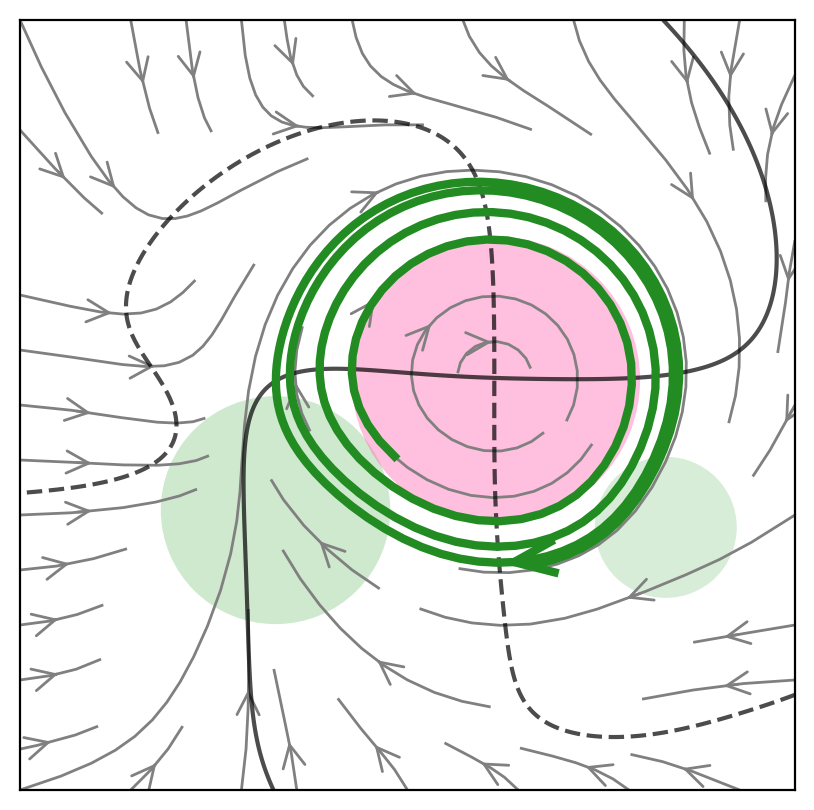

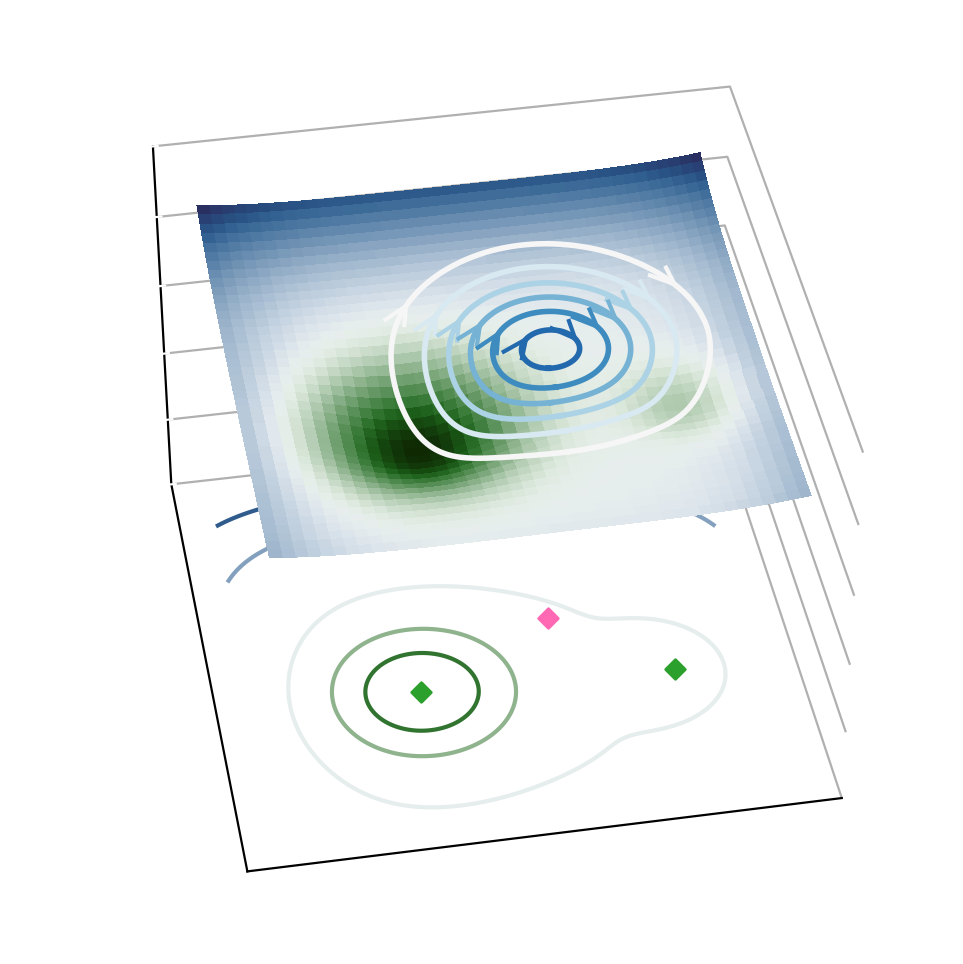

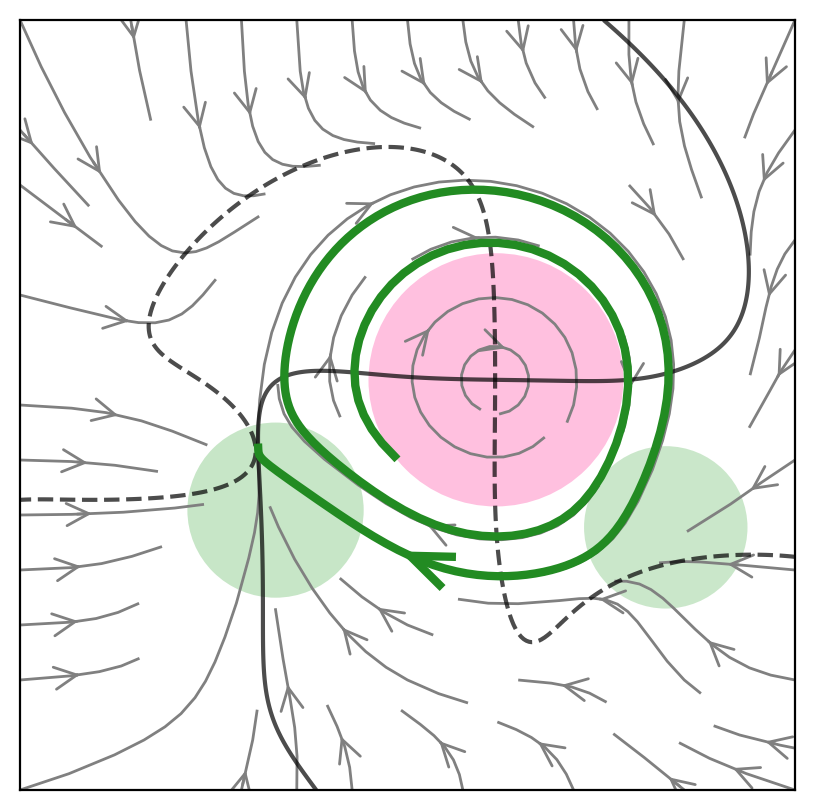

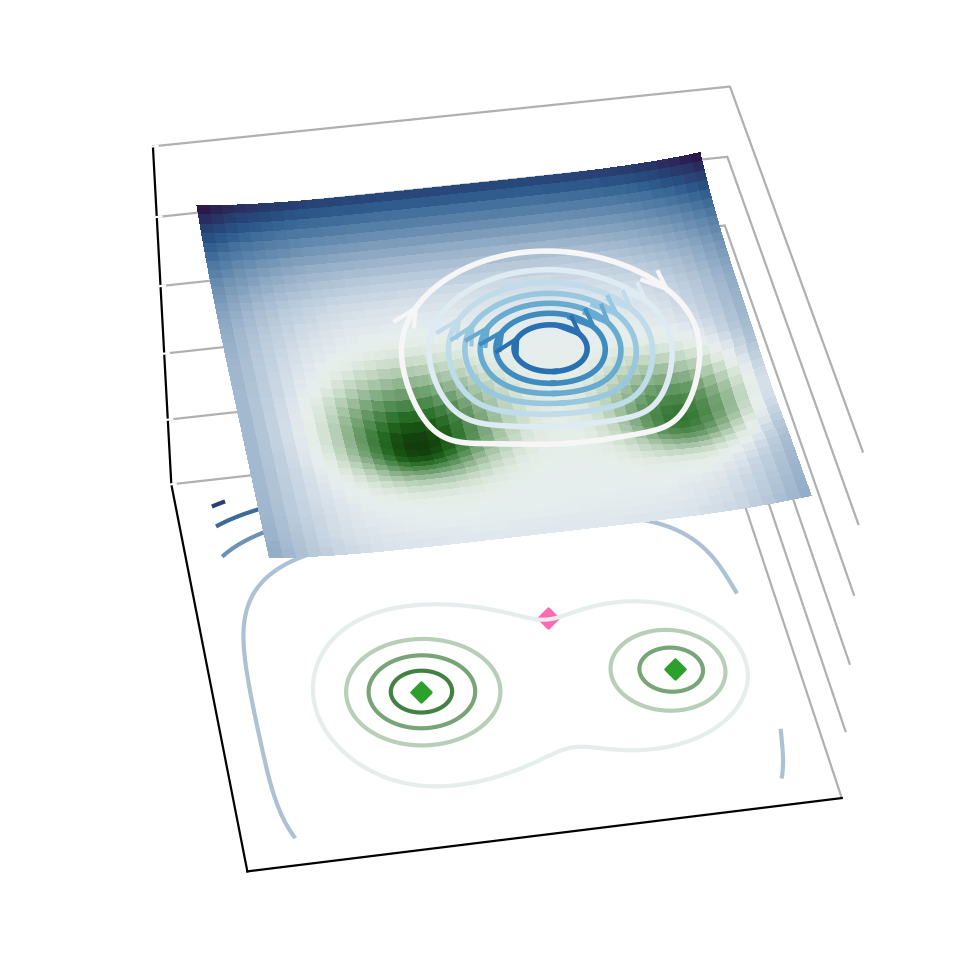

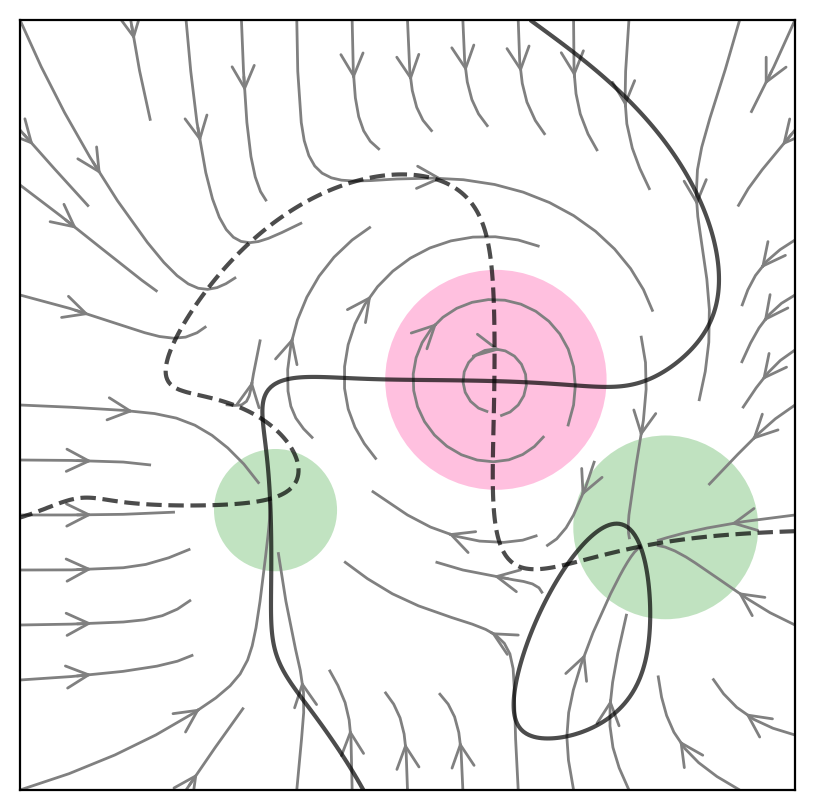

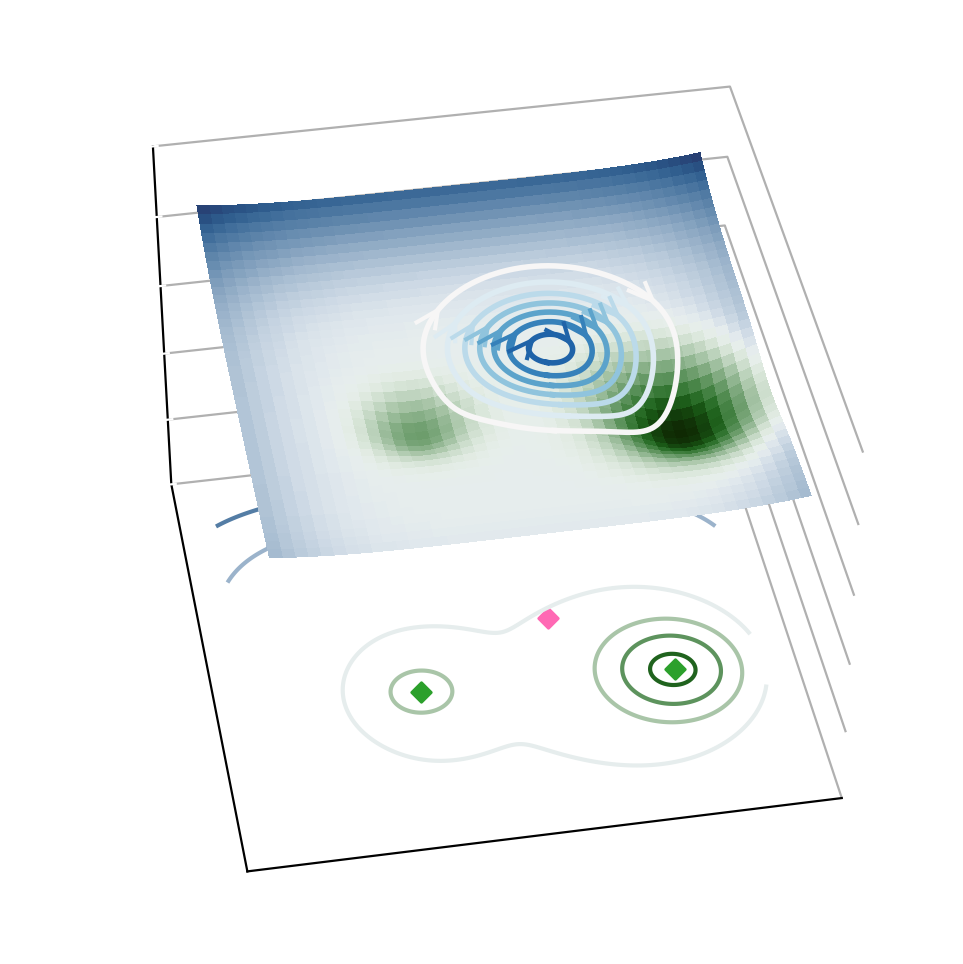

In [16]:
module_list = [M1, M2, M3,]

landscape = Somitogenesis_Landscape(module_list, regime=mr.mr_sigmoid, morphogen_times=(0.,), A0=0.005)

zlim=(-4 ,1)

start = (50, 100, 0)   # 100, 10, 0 
# init_cond = ((1.6, 0.5), (1.65, 0.5), (1.21, 1.11))
init_cond = ((-0.1, 0.6), (-0.1, 0.6), (1.21, 1.11))

times = ((0, 25, 251), (0, 25, 251), None)

for it, t in enumerate((-5., -0., 5.)):
    fig = visualize_landscape_t(landscape, xx, yy, t=t, color_scheme='fp_types', traj_init_cond=init_cond[it], traj_times=times[it])
    fig = visualize_potential(landscape, xx, yy, t=t, elev=40, azim=-100, color_scheme='fp_types', scatter=True, cmap_center=0.0, zlim=zlim, rot_contour=True)

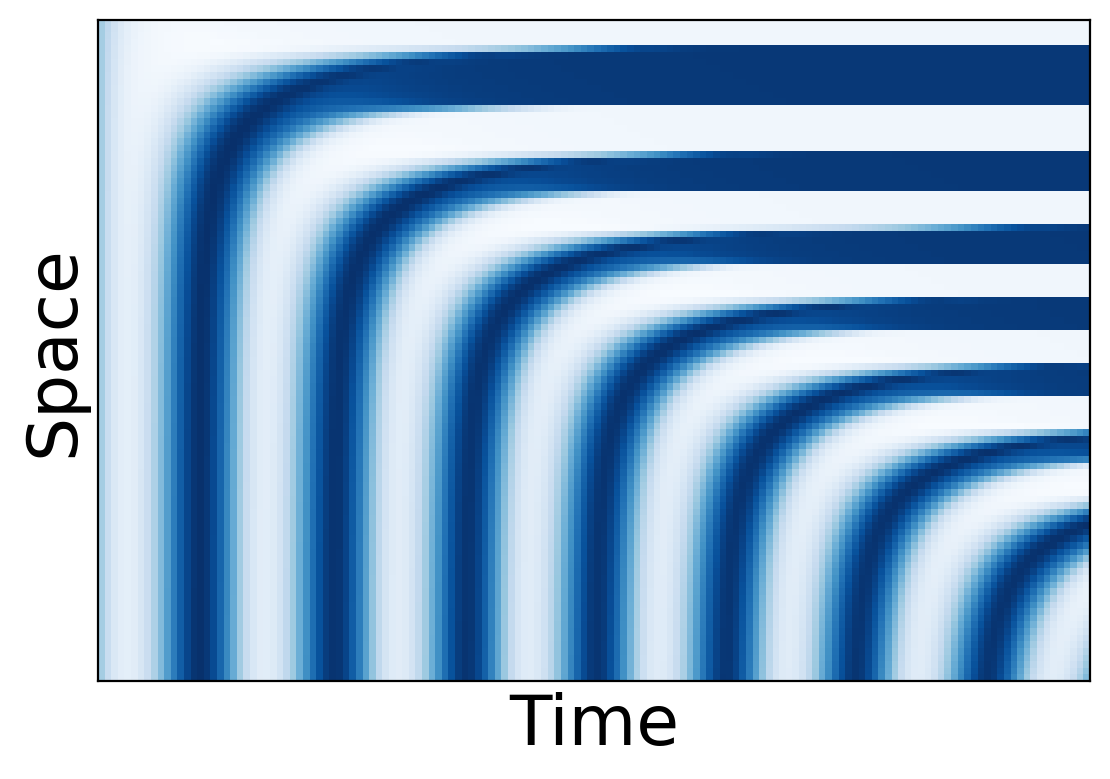

In [19]:
time_pars = (0., 50., 201)

fitness_pars = {
    'ncells': 100,
    'time_pars': time_pars,
    'init_state': (0., 0.),
    't0_shift': 0.5,  # shift (delay) of the time of transition between 2 neighbor cells 
    'noise': 0.0,
    'low_value': -1.,
    'high_value': 1.,
    'penalty_weight': 0.1,
    't_stable': 5, # how many timepoints should be at steady state
    'ndt': 50,
}

landscape.get_fitness(fitness_pars)
plt.imshow(landscape.result[:, :150], cmap='Blues')
plt.xlabel('Time', fontsize=25)
plt.ylabel('Space', fontsize=25)
plt.xticks(())
plt.yticks(())
plt.show()